# Bike Sharing

Using data from bike sharing services to figure out what conditions are best to take out a bike.

In [ ]:
!pip install pycaret



In [2]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.3.2'

In [3]:
### load sample dataset
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip -q Bike-Sharing-Dataset.zip


In [4]:
import pandas as pd
data = pd.read_csv('hour.csv')
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


## Setup

In [6]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target = 'cnt', session_id = 123)

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 13)"
4,Transformed data shape,"(17379, 13)"
5,Transformed train set shape,"(12165, 13)"
6,Transformed test set shape,"(5214, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


## Compare Models


In [8]:
# compare baseline models
best = compare_models(include=['et', 'rf', 'gbr', 'lr', 'ridge'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,26.0132,1831.7017,42.6846,0.9439,0.3474,0.3218,0.7110
rf,Random Forest Regressor,26.5309,1958.5411,44.1677,0.9401,0.3540,0.3273,0.6330
gbr,Gradient Boosting Regressor,47.8208,4944.5863,70.2541,0.8482,0.6820,0.9764,0.2240
lr,Linear Regression,105.0420,19832.9458,140.7897,0.3922,1.2112,3.3583,0.0070
ridge,Ridge Regression,105.0407,19832.7554,140.7891,0.3922,1.2111,3.3584,0.0080


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [20]:
chosen = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,26.3317,1786.9598,42.2724,0.9430,0.3217,0.2925
1,25.9076,1758.4842,41.9343,0.9473,0.3587,0.3302
2,26.3447,1802.0812,42.4509,0.9461,0.3522,0.3469
3,26.5018,1935.4804,43.9941,0.9417,0.3535,0.3425
4,23.1055,1254.0308,35.4123,0.9576,0.3458,0.3243
5,25.3503,1715.5060,41.4187,0.9466,0.3417,0.3007
6,26.8184,1913.9091,43.7482,0.9431,0.3415,0.3068
7,25.1150,1725.9786,41.5449,0.9510,0.3466,0.3152
8,27.0051,2204.9566,46.9570,0.9307,0.3557,0.3235


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
tuned_chosen = tune_model(chosen)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,44.2524,4318.1590,65.7127,0.8622,0.4764,0.5635
1,42.3075,4036.2001,63.5311,0.8789,0.4975,0.5973
2,41.9133,3966.7035,62.9818,0.8813,0.5005,0.6343
3,43.5996,4337.9725,65.8633,0.8692,0.4856,0.5790
4,40.1987,3513.8716,59.2779,0.8811,0.5042,0.6293
5,42.6697,4227.6310,65.0202,0.8684,0.4966,0.5856
6,45.1528,4713.8139,68.6572,0.8598,0.4894,0.5645
7,42.8511,4595.5048,67.7902,0.8696,0.5264,0.6658
8,45.6696,4822.6313,69.4452,0.8485,0.5170,0.6289


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Analyze Model

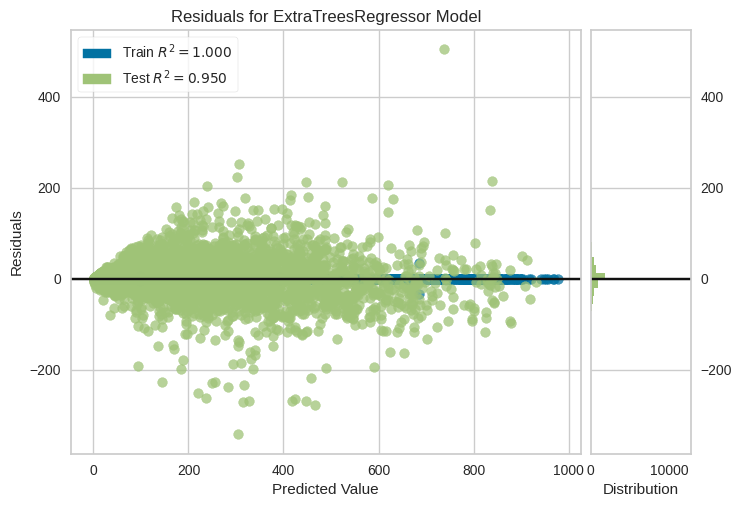

In [32]:
# plot residuals
plot_model(chosen, plot = 'residuals')

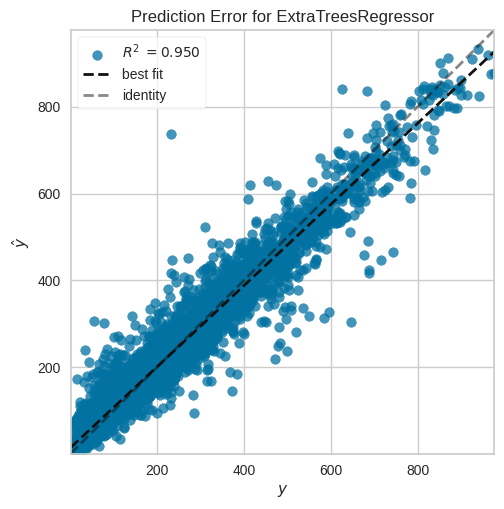

In [33]:
# plot error
plot_model(chosen, plot = 'error')

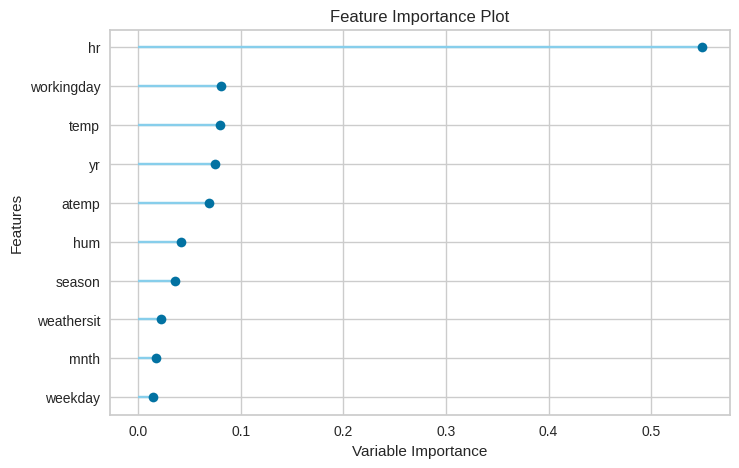

In [34]:
# plot feature importance
plot_model(chosen, plot = 'feature')

In [35]:
evaluate_model(chosen)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction


In [36]:
# predict on test set
holdout_pred = predict_model(chosen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,25.3146,1672.9361,40.9015,0.9499,0.3361,0.3103


In [37]:
# show predictions df
holdout_pred.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,prediction_label
5792,3,0,9,19,0,6,0,1,0.70,0.6667,0.74,0.1343,295,294.07
7823,4,0,11,14,0,0,0,1,0.62,0.6212,0.43,0.4627,313,429.48
15426,4,1,10,23,0,2,1,2,0.48,0.4697,0.77,0.0896,84,92.77
15028,4,1,9,9,0,0,0,1,0.50,0.4848,0.51,0.3284,276,302.39
12290,2,1,6,7,0,5,1,2,0.64,0.5758,0.89,0.1940,402,411.47


In [28]:
# copy data and drop count

new_data = data.copy()
new_data.drop('cnt', axis=1, inplace=True)
new_data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [38]:
# predict model on new_data
predictions = predict_model(chosen, data = new_data)
predictions.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,prediction_label
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1.0


___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [39]:
# save pipeline
save_model(chosen, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                              'holiday', 'weekday', 'workingday',
                                              'weathersit', 'temp', 'atemp',
                                              'hum', 'windspeed'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=123))]),
 'my_first_pipeline.pkl')

In [40]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                             'holiday', 'weekday', 'workingday',
                                             'weathersit', 'temp', 'atemp',
                                             'hum', 'windspeed'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])